In [ ]:
from energy.maximum_energy_calculate import maximum_energy_calculate
import pandas as pd
plc = [40]
ts = maximum_energy_calculate(plc)
print(ts)
if isinstance(ts, pd.DataFrame):
    ts.to_csv('try.csv')

In [ ]:
from clock.get_current_time import get_current_time
from clock.time_count import time_count
stime = '2022-09-04 '+get_current_time()[1]
end_time = get_current_time()[0]
time_count(stime, end_time)

In [ ]:
from energy.maximum_energy_calculate import maximum_energy_calculate
from energy.median_energy_calculate import median_energy_calculate
from clock.get_current_time import get_current_time
import datetime
from settings import fmt1
start_time = '2022-09-16 14:00:00'
end_time = get_current_time()[0]
median_energy_calculate(start_time, end_time, [40])

In [ ]:
from mongodb.query_request import query_request
import datetime
from settings import fmt1, filter_for_energy_calculation
start_time = '2022-09-15 08:00:00'
end_time = '2022-09-15 08:05:00'
start_time_ts = datetime.datetime.strptime(start_time, fmt1)
end_time_ts = datetime.datetime.strptime(end_time, fmt1)
data = query_request.datalog_query(start_time_ts, end_time_ts, [48], filter_for_energy_calculation)
data

In [ ]:
from sched import scheduler
from clock.get_current_time import get_current_time
from energy.energy_trigger import energy_trigger
from apscheduler.schedulers.blocking import BlockingScheduler
start_time = get_current_time()[0]
def et_try():
    print('---Begin---')
    plc = [2]
    flag = energy_trigger(plc)
    print(get_current_time()[0], flag)
    print('---end---')
scheduler = BlockingScheduler()
scheduler.add_job(et_try, 'interval', seconds = 2)
scheduler.start()

In [ ]:
from sched import scheduler
from clock.get_current_time import get_current_time
from energy.energy_trigger import energy_trigger
from apscheduler.schedulers.blocking import BlockingScheduler
from plcid.query_all_plc import query_all_plc
from settings import plc_csv_file, plc_csv_path
import pandas as pd
start_time = get_current_time()[0]
def diagnose_trigger_service():
    print('---Begin---')
    plc_update = query_all_plc()
    df_plc = pd.read_csv(plc_csv_path+plc_csv_file)
    plc_set = df_plc['plc'].values
    for i in range(0, df_plc.shape[0]):
        plc = [int(plc_set[i])]
        print(plc)
        flag = energy_trigger(plc)
        print(get_current_time()[0], flag)
    print('---end---')
scheduler = BlockingScheduler()
scheduler.add_job(diagnose_trigger_service, 'interval', seconds = 15)
scheduler.start()

In [14]:
import pandas as pd
a = pd.DataFrame({'A':[1,2,3], 'B':[1,2,3]})
b = pd.DataFrame({'A':[4,5,6], 'B':[4,5,6]})
c = pd.concat([a,b], axis=0, ignore_index=True)

In [ ]:
from messager.dingtalk_chatbot import dingtalkchatrobot
import pandas as pd
from settings import plc_csv_file, plc_csv_path
#dingtalkchatrobot.energy_trigger_sender()
df_plc = pd.read_csv(plc_csv_path+plc_csv_file)
plcset = df_plc['plc'].values
minus_set = []
zero_set = []
one_set = []
for plc in plcset:
    plc = [plc]
    energy_flag = dingtalkchatrobot.get_trigger(plc)
    if energy_flag == 0:
        zero_set.append(energy_flag)
    if energy_flag == -1:
        zero_set.append(energy_flag)
    if energy_flag == 1:
        zero_set.append(energy_flag)
print('0:', zero_set)
print('-1:', minus_set)
print('1:', one_set)

In [ ]:
from mongodb.query_request import query_request
from clock.get_current_time import get_current_time
import datetime
from settings import energy_trigger_sender_webhook, \
    energy_trigger_sender_secret, bot_query_dayrange, filter_for_energy_trigger, fmt1
now_time = get_current_time()[0]
now_time_ts = datetime.datetime.strptime(now_time, fmt1)
start_time_ts = now_time_ts - datetime.timedelta(days=bot_query_dayrange)
print(start_time_ts ,now_time_ts)
data = query_request.trigger_query(start_time_ts, now_time_ts, [2], \
    filter_for_energy_trigger)

In [ ]:
threshold = [1,1]
max = [2,2]
plc = [2]
text_report = 'PLC_id:'+str(plc[0])+', '+'[充电量标准]forward:'+str(threshold[0])+', [放电量标准]reverse:'+str(threshold[0])+',\n'\
                +'[24小时内最大充电量]forward:'+str(max[0])+', [24小时内最大放电量]reverse:'+str(max[1])+'.'
print(text_report)

In [ ]:
import pandas as pd
df = pd.DataFrame({'A':[-1,-2,-3]})
b = abs(df['A']).max()
c = df[abs(df['A'])>1].index
col = df.columns.get_loc('A')
df.iloc[c.values, col] = 0
df

In [ ]:
from mongodb.query_request import query_request
from settings import plc_csv_file, plc_csv_path, filter_for_energy_threshold, fmt1
import pandas as pd
from clock.get_current_time import get_current_time
import datetime
df_plc_list = pd.read_csv(plc_csv_path+plc_csv_file)
plcset = df_plc_list['plc'].values
df_thres = pd.DataFrame()
for i in range(0, len(plcset)):
    plc = [int(plcset[i])]
    print(plc)
    start_time = str(df_plc_list[df_plc_list['plc']==plc[0]]['time'].values[0])
    start_time_ts = datetime.datetime.strptime(start_time, fmt1)
    now_time = get_current_time()
    now_time_ts = datetime.datetime.strptime(now_time[0], fmt1)
    data = query_request.threshold_query(start_time_ts, now_time_ts, plc, filter_for_energy_threshold)
    if len(data) > 0:
        thres_f = data[0]['median_max_forward']
        thres_r = data[0]['median_max_reverse']
        if thres_f >= 0 and thres_r >= 0:
            print(start_time_ts)
            thres_end_time_ts = start_time_ts + datetime.timedelta(days=7)
            print(thres_end_time_ts)
            to_append = pd.DataFrame({'plc': [plc[0]], '开始时间': [start_time_ts], '结束时间': [thres_end_time_ts], \
                                      '最大单次充电量': [thres_f], '最大单次放电量': [thres_r]})
            df_thres = df_thres.append(to_append)
df_thres = df_thres.sort_values(by = 'plc', ascending=True)
df_thres = df_thres.reset_index(drop=True)
df_thres = df_thres.loc[:, ~df_thres.columns.str.contains("^Unnamed")]
df_thres.to_csv('有效最大单次充放电量.csv')

In [ ]:
from data.dron import dron
data = dron.find_battery_to_check([40])

In [ ]:
data['Voltage'].mean()

In [ ]:
data['Voltage'].std()

In [ ]:
data

In [ ]:
(3.410-data['Voltage'].mean())/data['Voltage'].std()

In [ ]:
2.815975*data['Voltage'].std()+data['Voltage'].mean()

In [ ]:
from soc.main_entry import SOC
import time
from mongodb.query_request import query_request
import importlib
from clock.get_current_time import get_current_time
import datetime
import numpy as np

settings = importlib.import_module('settings')
now_time = get_current_time()[0]
now_time = '2022-09-26 23:00:00'
plc = [40]
now_time_ts = datetime.datetime.strptime(now_time, settings.fmt1)
start_time_ts = now_time_ts - datetime.timedelta(days=settings.day_interval)
data = query_request.datalog_query(start_time_ts, now_time_ts, plc, \
                                    settings.filter_for_data_collection)
for i in range(0, len(data)):
    theTime = (data[i]['time']).strftime('%Y-%m-%d %H:%M:%S')
    theVolt = np.int16(data[i]['data']['1组1号电池电压'])/1000
    theCurr = np.int16(data[i]['data']['PCS电池电流'])/10
    theTemp = 25
    
    if i > 20:
        theStatus = -1
    else:
        theStatus = 0
    print(theTime, theVolt, theCurr, theTemp, theStatus)
    soc = SOC(40, theTime, theVolt, theCurr, theTemp, theStatus)
    print(soc.predict_soc)

In [6]:
from mysql.mysql_model import *
mysql_session = get_session()
thres_parameter = mysql_session.query(energy_threshold).filter(energy_threshold.plc_id==40).all()
thres_parameter[0].median_max_forward

215.6

In [6]:
import datetime
try1 = diagnose_trigger(plc_id=2, time = datetime.datetime.now(), energy_flag = 0)
mysql_session.add(try1)
mysql_session.commit()

In [22]:
import pandas as pd
pd.to_datetime(data.time)
mysql_session.query(diagnose_trigger).filter(diagnose_trigger.plc_id==1).update({'time':pd.to_datetime(datetime.datetime.now())})
mysql_session.commit()

In [20]:
mysql_session.close()

In [11]:
query[0].time

datetime.datetime(2022, 9, 30, 18, 3, 18)

In [17]:
# add/update data:
import sqlalchemy
import datetime
from pandas import to_datetime
from mysql.mysql_model import *
mysql_session = get_session()
query = mysql_session.query(diagnose_trigger).filter(diagnose_trigger.plc_id==3).all()
if len(query) == 1:
    mysql_session.query(diagnose_trigger).filter(diagnose_trigger.plc_id==3).update({'time':to_datetime(datetime.datetime.now()), 'energy_flag':0})
    mysql_session.commit()
else:
    if len(query) < 1:
        add = diagnose_trigger(plc_id=3, time=to_datetime(datetime.datetime.now()), energy_flag=1)
        mysql_session.add(add)
        mysql_session.commit()
    else:
        print('PLC_ID ' + str(3) + 'has more than one segment of data.')



In [11]:
a = 'A'
b = ['A', 'B']
(a in b)

'a' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
from soc.getParamESC import getParamESC
import scipy.io as scio
import numpy as np
matfile = './soc/280Ahmodel.mat'
model = scio.loadmat(matfile)['model']
#getParamESC('A', 25, model)
len(model['temps'][0][0][0])
param = 'QParam'
model[param][0][0]

array([[296.24084078, 296.24084078, 294.19283844, 293.36870169,
        293.36870169]])

In [8]:
param = 'OCVeta'
model[param][0][0].shape


(5, 1)

In [12]:
import numpy as np
np.array(a).reshape(1, )

array([1])

In [40]:
np.array([[1,2,3]])[0, :]

array([1, 2, 3])

In [48]:
from scipy.interpolate import make_interp_spline
x = np.array([1,2,3,4])
y = np.array([2,4,6,5])
make_interp_spline(x, y)(1)

array(2.)

In [1]:
from soc.getParamESC import getParamESC
import scipy.io as scio
import numpy as np
matfile = './soc/280Ahmodel1.mat'
model = scio.loadmat(matfile)['model']
getParamESC('QParam', 25, model)
# a = getParamESC('RCParam', 20, model)
# b = getParamESC('RCParam', 22, model)
# c = getParamESC('RCParam', 25, model)
# print(a)
# print(b)
# print(c)
# x = [20,22,25]
# y = [a[0], b[0], c[0]]
# import matplotlib.pyplot as plt
# plt.plot(x,y)
# np.exp(-60/abs(getParamESC('RCParam',25,model)))
# np.sign(2)
# RC = np.exp(-60/abs(getParamESC('RCParam',25,model))).reshape(-1,1)
# np.diag(RC[0][0])
from soc.getfield_mat import getfield_mat
for name in getfield_mat(model):
    if name != 'name':
        print(name, getParamESC(name, 25, model).shape)


OCV0 (201, 1)
OCVrel (201, 1)
SOC (201, 1)
OCV (113, 1)
SOC0 (113, 1)
SOCrel (113, 1)
OCVeta (1, 1)
OCVQ (1, 1)
temps (1, 1)
etaParam (1, 1)
QParam (1, 1)
GParam (1, 1)
M0Param (1, 1)
MParam (1, 1)
R0Param (1, 1)
RCParam (3, 1)
RParam (3, 1)
dOCV0 (201, 1)
dOCVrel (201, 1)


In [2]:
from soc.getParamESC import getParamESC
import scipy.io as scio
import numpy as np
matfile = './soc/280Ahmodel1.mat'
model = scio.loadmat(matfile)['model']
getParamESC('QParam', 100, model)

array([[293.36870169]])

In [9]:
ind = np.array([[1,2],[3,4],[5,6]])
irInd = range(0, 3)
list(irInd)

[0, 1, 2]

In [10]:
from soc.OCVfromSOCtemp import OCVfromSOCtemp
from soc.SOCfromOCVtemp import SOCfromOCVtemp
import scipy.io as scio

matfile = './soc/280Ahmodel.mat'
model = scio.loadmat(matfile)['model']
OCVfromSOCtemp(-0.5, 22, model)
SOCfromOCVtemp(2.8, 22, model)

array([0.00672293])

In [2]:
from soc.ekfData import ekfData
ekfData = ekfData(1,1,1,
                  2,
                  3,
                  4,
                  5,6,7,8,9)
ekfData.irInd

1

In [1]:
from soc.initEKF import initEKF
import scipy.io as scio
matfile = './soc/280Ahmodel.mat'
model = scio.loadmat(matfile)['model']
ekfData = initEKF(3.2, 25, 1,1,1, model)
ekfData.xhat

[array([[0., 0., 0.]]), 0, array([[0.05891613]])]

In [9]:
import numpy as np
nx = len(ekfData.xhat)
np.zeros((nx, nx))
((np.matrix(np.zeros((1, nx))))+1)*((np.array(np.zeros((nx, 1))))+1)
((np.matrix(np.zeros((nx, nx))))+1)[tuple(i), tuple([1,2])]

matrix([[1., 1.]])

In [22]:
import numpy as np
m = np.matrix([
               [1,2,3],
               [4,5,6],
               [7,8,9],
               ])
p = m[i, :]
p = p[:, i]
q = m
q[[0,1], [0,1]] = 0
q

matrix([[0, 2, 3],
        [4, 0, 6],
        [7, 8, 9]])

In [1]:
from soc.getParamESC import getParamESC
from soc.dOCVfromSOCtemp import dOCVfromSOCtemp
from soc.OCVfromSOCtemp import OCVfromSOCtemp
import numpy as np
from settings import numpoles

def iterEKF(vk, ik, Tk, deltat, ekfData):
    model = ekfData.model
    Q  = getParamESC('QParam',Tk,model)
    G  = getParamESC('GParam',Tk,model)
    M  = getParamESC('MParam',Tk,model)
    M0 = getParamESC('M0Param',Tk,model)
    RC = np.exp(-deltat/abs(getParamESC('RCParam',Tk,model))).reshape(-1,1)
    R  = getParamESC('RParam',Tk,model).reshape(-1,1)
    R0 = getParamESC('R0Param',Tk,model)
    eta = getParamESC('etaParam',Tk,model)
    if ik < 0:
        ik = ik*eta
    I = ekfData.priorI
    SigmaX = ekfData.SigmaX
    SigmaV = ekfData.SigmaV
    SigmaW = ekfData.SigmaW
    xhat = ekfData.xhat
    irInd = ekfData.irInd
    hkInd = ekfData.hkInd
    zkInd = ekfData.zkInd
    if abs(ik) > Q/100:
        ekfData.signIk = np.sign(ik)
    signIk = ekfData.signIk
    
    # EKF Step 0: Compute Ahat[k-1], Bhat[k-1]
    nx = xhat.shape[0]
    # Ahat
    Ahat = np.matrix(np.zeros((nx, nx)))
    Ahat[[irInd], [irInd]] = RC.reshape(1, -1)
    Ahat[zkInd, zkInd] = 1
    Ah = np.exp(-abs(I*G*deltat/(3600*Q)))
    Ahat[hkInd, hkInd] = Ah
    # Ahat = np.diag(np.append(RC, [0, 0]))
    # row, col = np.diag_indices_from(Ahat)
    # Ahat[row,col] = RC
    # print(Ahat)

    # Bhat
    Bhat = np.matrix(np.zeros((nx, 1)))
    Bhat[zkInd, 0] = -deltat/(3600*Q)
    Bhat[[irInd], 0] = (1-RC).reshape(1, -1)
    B = np.c_[Bhat, 0*Bhat]
    Bhat[hkInd, 0] = -abs(G*deltat/(3600*Q))*Ah*(1+np.sign(I)*xhat[hkInd])
    B[hkInd,1] = Ah-1
    # Bhat = np.matrix(np.zeros((nx, 2)))
    # Bhat[zkInd, 0] = -deltat/(3600*Q)
    # Bhat[[irInd], 0] = (1-RC).reshape(1, -1)
    # B = [Bhat, 0*Bhat]
    # print(B)
    # print(Bhat)

    # Step 1a: State estimate time update
    xhat = np.matrix(xhat.reshape(-1,1))
    xhat = Ahat*xhat + B*np.matrix(np.array([I,np.sign(I)]).reshape(-1,1)) 
    xhat[hkInd, 0] = min(1,max(-1, xhat[hkInd, 0]))
    xhat[zkInd, 0] = min(1.05,max(-0.05,xhat[zkInd, 0]))

    # Step 1b: Error covariance time update
    SigmaX = Ahat*SigmaX*Ahat.T + Bhat*SigmaW*Bhat.T

    # Step 1c: Output estimate
    yhat = OCVfromSOCtemp(xhat[zkInd, 0], Tk, model) + M0*signIk + \
         M*xhat[hkInd, 0] - np.matrix(R.reshape(-1,numpoles))*xhat[irInd] - R0*ik
    
    # Step 2a: Estimator gain matrix
    Chat = np.matrix(np.zeros([1, nx]))
    Chat[0, zkInd] = dOCVfromSOCtemp(xhat[zkInd, 0], Tk, model)
    Chat[0, hkInd] = M
    Chat[0, [irInd]] = -1*R.reshape(1, -1)
    Dhat = np.matrix(np.zeros([1, 2]))
    Dhat[0, 0] = -R0
    Dhat[0, 1] = M0
    SigmaY = Chat*SigmaX*Chat.T + 1#Dhat*SigmaV*Dhat.T
    L = SigmaX*Chat.T/SigmaY
    
    # Step 2b: State estimate measurement update
    r = vk - yhat
    if r**2 > 100*SigmaY:
        L[:,0] = 0.0
    xhat = xhat + L*r
    xhat[hkInd, 0] = min(1,max(-1,xhat[hkInd, 0]))
    xhat[zkInd, 0] = min(1.05,max(-0.05,xhat[zkInd, 0]))

    # % Step 2c: Error covariance measurement update  
    SigmaX = SigmaX - L*SigmaY*L.T
    if r**2 > 4*SigmaY:
        print('Bumping SigmaX')
        SigmaX[zkInd, zkInd] = SigmaX[zkInd, zkInd]*ekfData.Qbump
    temp, S, V = np.linalg.svd(SigmaX)
    S = np.diag(S)
    S_shape = S.shape
    V_shape = V.shape
    diff_shape_col = V_shape[1]-S_shape[0]
    if diff_shape_col > 0:
        add_S = np.matrix(np.zeros((S_shape[0], diff_shape_col)))
        S = np.c_[S, add_S]
    HH = V*S*V.T
    SigmaX = (SigmaX + SigmaX.T + HH + HH.T)/4
    
    ekfData.priorI = ik
    ekfData.SigmaX = SigmaX
    ekfData.xhat = xhat
    zk = xhat[zkInd, 0]
    zkbnd = 3*np.sqrt(SigmaX[zkInd,zkInd])
    return ekfData
    

if __name__ == '__main__':
    from soc.initEKF import initEKF
    import scipy.io as scio
    matfile = './soc/280Ahmodel.mat'
    model = scio.loadmat(matfile)['model']
    SigmaX0 = np.diag([1e-6, 1e-8, 2e-4])
    # SigmaX0 = np.diag([1e-6, 1e-6, 1e-6, 1e-8, 2e-4])
    ekfData = initEKF(3.2, 25, SigmaX0, 1, 1, model)
    ekfData = iterEKF(3.2,-20, 25, 60, ekfData)
    ekfData = iterEKF(3.2,-20, 25, 60, ekfData)
    print(ekfData.xhat)
    

[[-2.00119808e+01]
 [-7.94621308e-15]
 [ 6.00197557e-02]]


In [ ]:
from asyncio import run
from soc.runEKF import runEKF
import pandas as pd
from data.dron import dron
df = dron.find_battery_to_check([47])
bat_set = df['Voltage.name'].unique()
bat = bat_set[0]
df_bat = df[df['Voltage.name'].isin([bat])]
df_result = runEKF(df_bat)
df_result.to_csv('try2.csv')

In [1]:
from soc.runEKF import runEKF
from energy.current_parameter import current_parameter
import pandas as pd
# bat_set = df['Voltage.name'].unique()
# bat = bat_set[0]
# df_bat = df[df['Voltage.name'].isin([bat])]
df_bat = pd.read_csv('test_data.csv')
df_result = runEKF(df_bat)
df_result.to_csv('try.csv')

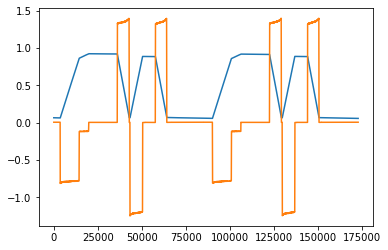

In [2]:
x = df_result['Time'].values
y = df_result['SOC'].values
y2 = df_result['Current'].values
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.plot(x, y2/100)

In [10]:
import pandas as pd
df = pd.read_csv('./soc/py.csv', index_col=0, encoding='ISO-8859-1')
y1 = df['SOC'].values
y2 = df['soc1'].values
x = df.index.values
df['reset'] = df['SOC']-df['soc1']
y3 = df['reset'].values

In [ ]:
from soc.dOCVfromSOCtemp import dOCVfromSOCtemp
from soc.SOCfromOCVtemp import SOCfromOCVtemp
from soc.initEKF import initEKF
import scipy.io as scio
import numpy as np
matfile = './soc/280Ahmodel.mat'
model = scio.loadmat(matfile)['model']
dOCVfromSOCtemp([0.0589], 25, model)
SOCfromOCVtemp([3.265], 31.5, model)
SigmaX0 = np.diag([1e-6, 1e-8, 2e-4])
SigmaX0 = np.diag([1e-6, 1e-8, 2e-4])
ekfData = initEKF([3.267], 31.5, SigmaX0, 0.2, 0.2, model)
ekfData.xhat

In [16]:
import datetime
a = datetime.datetime.now().hour
a

13

In [22]:
# import pymysql.cursors
# conn = pymysql.connect(host="47.92.133.142",
#                        port=3306,
#                        user="root",
#                        passwd="123456",
#                        database="data_preprocessing", #引入你想要的在库里创建表
#                        charset="utf8")
# cursor = conn.cursor()
# cursor.execute("CREATE TABLE diagnosed_date (Date TIMESTAMP PRIMARY KEY)")


0

In [11]:
class student(object):
    def speak(self): ## 哪个对象调用了这个方法，self就是那个对象；可以把self理解为一个形参
        print("%s 说：我今年%s岁" % (self.name, self.age))
#类student 实例化一个对象john
john = student()
# 给对象添加属性
john.name = "约翰"
john.age = 19
# 调用类中的 speak()方法
john.speak()

约翰 说：我今年19岁


In [13]:
class student(object):
    # 定义构造方法
    def __init__(self, n, a): #__init__() 是类的初始化方法；它在类的实例化操作后 会自动调用，不需要手动调用；
    # 设置属性
        self.name = n
        self.age = a
        # 定义普通方法
    def speak(self):
        print("%s 说：我今年%s岁" % (self.name, self.age))
#类student 实例化一个对象john
john = student("约翰",19)
# 调用类中的 speak()方法
john.speak()

约翰 说：我今年19岁


In [ ]:
class student(object):
    # 定义构造方法
    def __init__(self, n, a):
    # 设置属性
        self.name = n
        self.age = a
    # 输出一个字符串(追踪对象属性信息变化)
    def __str__(self): # __str__(self)不可以添加参数(形参)
        return "名字：%s 年龄：%d" % (self.name, self.age)
# 实例化一个对象john
john = student("约翰",19)
# 当使用print输出对象时，只要自己定义了__str__(self)方法，那么就会打印从在这个方法中return的数据
print(john)